In [16]:
# Load libraries

import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
filename = 'dry_bean.csv'

names = ['AR', 'PM', 'MJL', 'MNL', 'ASP', 'ECC', 'CA', 'EQD', 'EXT', 
         'SOL', 'ROU', 'COM', 'SF1', 'SF2', 'SF3', 'SF4', 'CLA']

dataset = read_csv(filename, names=names)

In [3]:
# [Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, 
#  Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3, ShapeFactor4, Class]

In [7]:
# Descriptive Statistics

print(dataset.shape)

print("-----------------------------------------------------------------")

set_option('display.max_rows', 500)
print(dataset.dtypes)

print("-----------------------------------------------------------------")

set_option('display.width', 100) 
print(dataset.head(20))

print("-----------------------------------------------------------------")

set_option('precision', 3) 
print(dataset.describe())

print("-----------------------------------------------------------------")

print(dataset.groupby('CLA').size())



(13611, 17)
-----------------------------------------------------------------
AR       int64
PM     float64
MJL    float64
MNL    float64
ASP    float64
ECC    float64
CA       int64
EQD    float64
EXT    float64
SOL    float64
ROU    float64
COM    float64
SF1    float64
SF2    float64
SF3    float64
SF4    float64
CLA     object
dtype: object
-----------------------------------------------------------------
       AR       PM      MJL      MNL    ASP    ECC     CA      EQD    EXT    SOL    ROU    COM  \
0   28395  610.291  208.178  173.889  1.197  0.550  28715  190.141  0.764  0.989  0.958  0.913   
1   28734  638.018  200.525  182.734  1.097  0.412  29172  191.273  0.784  0.985  0.887  0.954   
2   29380  624.110  212.826  175.931  1.210  0.563  29690  193.411  0.778  0.990  0.948  0.909   
3   30008  645.884  210.558  182.517  1.154  0.499  30724  195.467  0.783  0.977  0.904  0.928   
4   30140  620.134  201.848  190.279  1.061  0.334  30417  195.897  0.773  0.991  0.985  0.971   

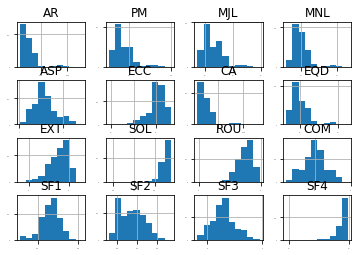

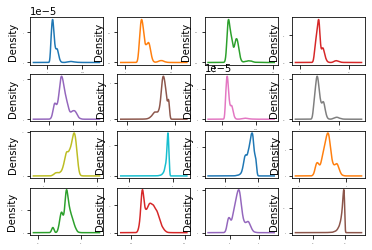

In [9]:
## Unimodal Data Visualizations

dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, 
             legend=False, fontsize=1)
pyplot.show()

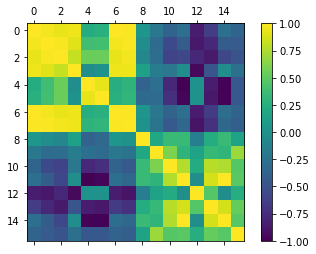

-------------------------------------------------------------------------------------------------------------
       AR    PM   MJL       MNL       ASP   ECC    CA   EQD   EXT   SOL   ROU       COM       SF1  \
AR   1.00  0.97  0.93  9.52e-01  2.42e-01  0.27  1.00  0.98  0.05 -0.20 -0.36 -2.68e-01 -8.48e-01   
PM   0.97  1.00  0.98  9.13e-01  3.85e-01  0.39  0.97  0.99 -0.02 -0.30 -0.55 -4.07e-01 -8.65e-01   
MJL  0.93  0.98  1.00  8.26e-01  5.50e-01  0.54  0.93  0.96 -0.08 -0.28 -0.60 -5.68e-01 -7.74e-01   
MNL  0.95  0.91  0.83  1.00e+00 -9.16e-03  0.02  0.95  0.95  0.15 -0.16 -0.21 -1.51e-02 -9.47e-01   
ASP  0.24  0.39  0.55 -9.16e-03  1.00e+00  0.92  0.24  0.30 -0.37 -0.27 -0.77 -9.88e-01  2.46e-02   
ECC  0.27  0.39  0.54  1.96e-02  9.24e-01  1.00  0.27  0.32 -0.32 -0.30 -0.72 -9.70e-01  1.99e-02   
CA   1.00  0.97  0.93  9.51e-01  2.43e-01  0.27  1.00  0.99  0.05 -0.21 -0.36 -2.70e-01 -8.48e-01   
EQD  0.98  0.99  0.96  9.49e-01  3.04e-01  0.32  0.99  1.00  0.03 -0.23 -0.44 -3.2

In [12]:
# Multimodal Data Visualizations

# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax)
pyplot.show()

print("-------------------------------------------------------------------------------------------------------------")

set_option('precision', 2) 
print(dataset.corr(method='pearson'))

In [21]:
# Split Dataset into train and test

array = dataset.values
X = array[: , :-1]
y = array[: , -1]

num_folds = 10
scoring = 'accuracy'
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    test_size=validation_size, 
                                                    random_state=seed
                                                   )

In [18]:
# Spot-Check Algorithms

models = list()
models.append(("LR", LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate Each Model
results, names = list(), list()

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

# SVM did incredibly poorly

LR: 0.866089 (0.006745)
LDA: 0.904756 (0.009442)
KNN: 0.722356 (0.008937)
CART: 0.894654 (0.007989)
NB: 0.763317 (0.006967)
SVM: 0.265062 (0.014298)


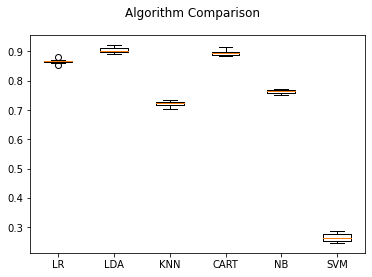

In [19]:
# Compare Algorithms

fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()


In [22]:
# Standardize the dataset

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC(gamma='auto'))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Note that SVM is now the best.

ScaledLR: 0.917431 (0.008356)
ScaledLDA: 0.904756 (0.009442)
ScaledKNN: 0.924963 (0.008060)
ScaledCART: 0.896491 (0.010261)
ScaledNB: 0.898878 (0.010306)
ScaledSVM: 0.930840 (0.006714)


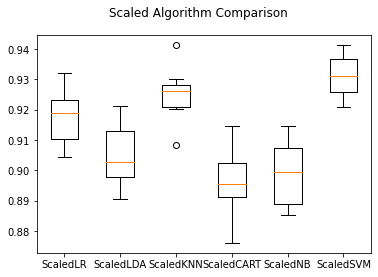

In [23]:
# Compare Algorithms

fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

In [24]:
# We will move ahead with KNN and SVM to try and improve their accuracies further

## KNN

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, 
                             grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.926891 using {'n_neighbors': 19}
0.908521 (0.010923) with: {'n_neighbors': 1}
0.919084 (0.007060) with: {'n_neighbors': 3}
0.924871 (0.008254) with: {'n_neighbors': 5}
0.924688 (0.008058) with: {'n_neighbors': 7}
0.925330 (0.006707) with: {'n_neighbors': 9}
0.924963 (0.007730) with: {'n_neighbors': 11}
0.924044 (0.007003) with: {'n_neighbors': 13}
0.926065 (0.008294) with: {'n_neighbors': 15}
0.926432 (0.007874) with: {'n_neighbors': 17}
0.926891 (0.007440) with: {'n_neighbors': 19}
0.925881 (0.007772) with: {'n_neighbors': 21}


In [25]:
## Tuning SVM 

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, 
                             grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.933137 using {'C': 2.0, 'kernel': 'rbf'}
0.927717 (0.008829) with: {'C': 0.1, 'kernel': 'linear'}
0.867467 (0.010007) with: {'C': 0.1, 'kernel': 'poly'}
0.926065 (0.007065) with: {'C': 0.1, 'kernel': 'rbf'}
0.798951 (0.008724) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.927350 (0.009257) with: {'C': 0.3, 'kernel': 'linear'}
0.891990 (0.010543) with: {'C': 0.3, 'kernel': 'poly'}
0.929004 (0.007205) with: {'C': 0.3, 'kernel': 'rbf'}
0.751743 (0.007279) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.927166 (0.009743) with: {'C': 0.5, 'kernel': 'linear'}
0.899613 (0.010066) with: {'C': 0.5, 'kernel': 'poly'}
0.929371 (0.006537) with: {'C': 0.5, 'kernel': 'rbf'}
0.736497 (0.007959) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.927258 (0.009388) with: {'C': 0.7, 'kernel': 'linear'}
0.903286 (0.011143) with: {'C': 0.7, 'kernel': 'poly'}
0.930197 (0.007223) with: {'C': 0.7, 'kernel': 'rbf'}
0.730344 (0.007276) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.926982 (0.009218) with: {'C': 0.9, 'kernel': 'linear'

In [26]:
# Ensemble Algorithms

ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier(n_estimators=10))) 
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10))) 

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, 
                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.689379 (0.038774)
GBM: 0.926983 (0.005123)
RF: 0.919452 (0.006130)
ET: 0.916053 (0.007313)


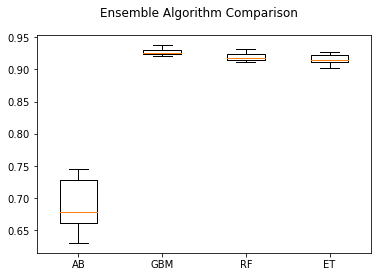

In [27]:
# Compare Algorithms

fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

In [29]:
# prepare the model for SVM

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset

rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


0.922879177377892
[[254   0  16   0   1   1   4]
 [  0  90   0   0   0   0   0]
 [  4   0 322   0   8   1   4]
 [  0   0   0 685   0  13  43]
 [  0   0   6   4 365   0   8]
 [  7   0   0   5   0 366  11]
 [  4   0   2  52   8   8 431]]
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.92      0.93       276
      BOMBAY       1.00      1.00      1.00        90
        CALI       0.93      0.95      0.94       339
    DERMASON       0.92      0.92      0.92       741
       HOROZ       0.96      0.95      0.95       383
       SEKER       0.94      0.94      0.94       389
        SIRA       0.86      0.85      0.86       505

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.92      0.92      0.92      2723

